# learning outcomes
1. Geometric transformations
    - Rotation
    - Translation
    - Affine transformation
    - Perspective transformation
2. Drawing functions: line, circle, ellipse, rectangle and text. 
3. Bitwise operations: OR, AND, NOT and XOR
4. Convolutions: 
    - Image smoothing
    - edge detection
    - sharpening
    - cornerstone of CNN training

# Setup

In [1]:
import sys 
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

# Geometric transformation
## Translation

In [7]:
img = cv.imread('images/lena.jfif')

#define M
h,w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1,0, tx], [0,1,ty]])
dst = cv.warpAffine(img, M, (w+tx, h+ty)) #for cv, starts with w first

show_img(f"translation tx:{tx}, ty:{ty}", dst)

## Rotation

In [10]:
# center, angle and scale
yc, xc = h // 2, w // 2

angle = 90 #anti clockwise, same as -270
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

dst = cv.warpAffine(img, M, (w,h))
show_img("rotation", dst)

## Rotation + translation

In [12]:
angle = 90

M = cv.getRotationMatrix2D((xc, yc), angle, 1)

# account for translation
M[0, 2] += tx 
M[1, 2] += ty

dst = cv.warpAffine(img, M, (w+tx,h+ty))
show_img("transformed", dst)

## Custom affine transformation

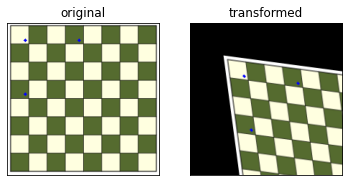

In [17]:
img = cv.imread('images/chessboard.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_copy = img.copy()
h,w = img.shape[:2]

p0 = np.float32([[25,25], [100, 25], [25, 100]])
p1 = np.float32([[75,75], [150, 85], [85, 150]])

#draw points p0 on the original image
for pt in p0: 
    cv.circle(img, (int(pt[0]), int(pt[1])), 2, (0,0,255), -1)

M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w,h))

plt.subplot(121), plt_img(img, "original")
plt.subplot(122), plt_img(dst, 'transformed')

plt.show()

In [18]:
dst[75, 75, :]

array([  0,   0, 255], dtype=uint8)

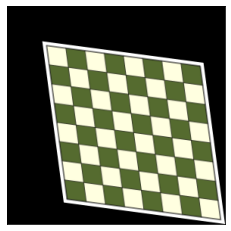

In [20]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

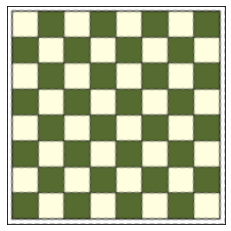

In [21]:
M_inv = cv.getAffineTransform(p1, p0)
img_restored = cv.warpAffine(dst_new, M_inv, (w,h))

plt_img(img_restored)

## Perspective transformation


In [30]:
# img = cv.imread("images/name_card_sample.webp")
img = cv.imread("images/dice.jfif")

show_img('name card', img)

In [31]:
p = []
img_copy = img.copy()
def mouse(event, x, y, flags, params): 
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img, (x,y), 2, (0,0,255), -1)
        cv.imshow('img', img)

cv.imshow("img", img)
cv.setMouseCallback('img', mouse)
cv.waitKey(0)
cv.destroyAllWindows


(10, 67)
(75, 97)
(85, 135)
(16, 104)


<function destroyAllWindows>

In [32]:
!pip install scipy 



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from scipy.spatial.distance import euclidean

In [35]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[3], p[2])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_arr = np.float32(p)
dst = np.float32([[0,0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("original", cv.WINDOW_NORMAL)
cv.imshow("original", img_copy)
show_img('warp', warp)

## Drawing functions

In [36]:
img = cv.imread('images/dog.jfif')
img.shape

(168, 300, 3)

In [37]:
#line
img_copy = img.copy()
cv.line(img_copy, (30, 80), (100, 150), (0,0,255), 4, cv.LINE_AA)
show_img('line', img_copy)

In [38]:
#circle
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 50, 255), 4, cv.LINE_AA)
show_img('line', img_copy)

In [43]:
# ellipse
img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (0,0,255), 4, cv.LINE_AA)
show_img('ellipse', img_copy)

In [46]:
#rectangle
img_copy = img.copy()
cv.rectangle(img_copy, (30,80), (100, 150), (100, 50, 255), 4, cv.LINE_8)
show_img('rectangle', img_copy)

In [47]:
#text
img_copy = img.copy()
cv.putText(img_copy, "I am a cute dog!", (15, 145), cv.FONT_HERSHEY_SIMPLEX, 0.65, (255, 0, 10), 2)
show_img('text', img_copy)

## create a drawing template
introduce some high level GUI provided by OPENCV.

In [49]:
WHITE = (255, 255, 255)
BLUE = (255, 0 ,0 )
GREEN = (0, 255, 0)
RED = (0,0,255)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (BLUE, GREEN, RED, CYAN, MAGENTA, YELLOW, WHITE)

#define trackbar functions, mouseclick callback function, and set up a while loop
#to display the drawing board 

def nothing(x): 
    pass

p0 = p1 = (0,0)
def mouse(event, x, y, flags, params): 
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN: 
        p0 = (x,y)
        
    elif event== cv.EVENT_LBUTTONUP:
        p1 = (x,y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d == 0: 
            d = -1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        
wn = "window"
tr1_name = "thickness"
tr2_name= "color"
cv.namedWindow(wn)
img = np.zeros((400,400,3), dtype = np.uint8)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while(1): 
    cv.imshow(wn,img)
    k = cv.waitKey(1) & 0xFF
    if k == 27: 
        break
        
        if k == ord('c'):
            img[:] = 0
            
cv.destroyAllWindows()



In [51]:
#bullseye
img = np.zeros((400, 400), np.uint8)
yc, xc = img.shape[0] //2, img.shape[1] //2

radius = np.arange(20, 200, 15)
for r in radius: 
    cv.circle(img, (xc, yc), r , 255, 2)

cv.putText(img, "Bullseye", (15, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255,2)

show_img('bullseye', img)

## Bitwise operation

In [52]:
# AND
# binary images

rect = np.zeros((400, 400), dtype = np.uint8)
rect[30: 370, 30:370] = 255
circle = np.zeros((400, 400), dtype = np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow('rectangle', rect)
show_img('circle', circle)

In [53]:
res_AND = cv.bitwise_and(rect, circle)

show_img('AND', res_AND)

In [54]:
res_OR = cv.bitwise_or(rect, circle)
show_img('OR', res_OR)

In [55]:
res_XOR = cv.bitwise_xor(rect,circle)
show_img("XOR", res_XOR)

In [56]:
# not
res_NOT = cv.bitwise_not(rect)
show_img("NOT", res_NOT)

In [57]:
# useful for masking
img = cv.imread('images/dog.jfif')
h, w = img.shape[:2]
mask = np.zeros((h,w), np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask =mask)
show_img('face', face)

## Convolutions

In [58]:
# identity kernel 

kernel = np.zeros((3, 3))
kernel[1,1] = 1
print(kernel)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


In [59]:
img = cv.imread('images/dog.jfif')

dst = cv.filter2D(img, -1, kernel)

show_img('identity', dst)

In [62]:
#smoothing kernel 
kernel = np.ones((5,5)) / 25

blur = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
show_img('blur', blur)

In [63]:
#use built-in function
blur_1 = cv.blur(img, (5,5))

cv.imshow('filter2D', blur)
show_img('built-in', blur_1)

In [64]:
#sharpening
 
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])

sharpen = cv.filter2D(img, -1, kernel)

show_img('sharpen', sharpen)

In [66]:
#unsharp masking
dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)
show_img('unsharp masking', dst)

# Exercise

1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.

    - Use external libraries imutils.
    - Modify the transformation matrix.

In [2]:
!pip install imutils

In [5]:
import imutils

img = cv.imread("images/lena.jfif")
dst = imutils.rotate_bound(img, 45)

show_img("rotation", dst)

2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:

In [8]:
img1 = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 80, 255, cv.THRESH_BINARY)
mask_inverse = cv.bitwise_not(mask)

img1_bg = cv.bitwise_and(roi, roi, mask = mask_inverse)

img2_rg = cv.bitwise_and(img2, img2, mask = mask)

dst = cv.add(img1_bg, img2_rg)
img1[0:rows, 0:cols] = dst

cv.namedWindow("result", cv.WINDOW_NORMAL)
show_img("result", img)
cv.waitKey(0)
cv.destroyAllWindows()

3. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':

In [9]:
# 3 x 3 kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("bee", img)
show_img("sharpen", sharpen)

In [11]:
# 5 x 5 kernel
kernel = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], 
                   [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("bee", img)
show_img("sharpen", sharpen)

The 3 x 3 kernel produces an output that is sharpened with clear edges. 
The 5 x 5 kernel produces and output that may be over-sharpened. 

4. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

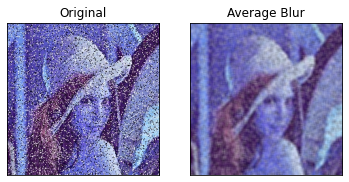

In [13]:
img = cv.imread("images/noise_lena.jpg")

# Apply average filter
average_filtered = cv.blur(img, (5, 5))

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(average_filtered), plt.title('Average Blur')
plt.xticks([]), plt.yticks([])
plt.show()

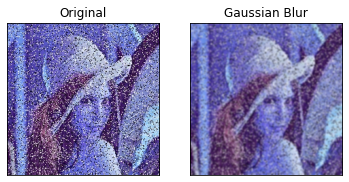

In [14]:
img = cv.imread("images/noise_lena.jpg")

# Apply Gaussian filter
gaussian_filtered = cv.GaussianBlur(img, (5, 5), 0)

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussian_filtered), plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

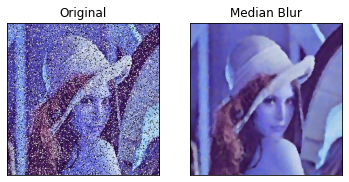

In [15]:
img = cv.imread("images/noise_lena.jpg")

# Apply median filter
median_filtered = cv.medianBlur(img, 5)

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median_filtered), plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.show()

Median filter produces the cleanest output. Therefore, salt and pepper noise is found in the original image, as the median filter is very effective at removing impulse noise. 

The principle of the median filter is to replace the gray level of each pixel by the median of the gray levels in a neighborhood of the pixels, instead of using the average operation.